# SVD преобразование

SVD (Singular Value Decompozition) - это метод, который пришёл в машинное обучение из линейной алгебры. Этот метод применяется для снижения размерности так же, как PCA.

Зачем нужен ещё один алгоритм? Пирсон придумал PCA очень давно и алгоритм для снижения размерности работает с ковариационной матрицей (см. Урок 3) - это слишком сложно по вычислениям и отвратительно работает на больших объёмах данных (просто медленно). Алгоритм SVD был придуман после Пирсона, когда компьютеры стали быстрее и появилась возможность перейти от точных методов к численным, вроде градиентного спуска с которым вы уже знакомы (подробнее про численный алгоритм SVD можно почитать [в этой лекции в разделе "Наивный алгоритм SVD"](http://strijov.com/files/eksamen/l_svd.pdf) - но осторожно, там много математики). Понимайте алгоритм SVD более применимую для больших данных версию PCA. Если размерность матрицы небольшая (до 100 фичей) - применяйте PCA, иначе SVD.

Суть метода состоит в том, что любую прямоугольную матрицу $X$ (у нас это матрица объекты-признаки) размерности $m\times n$ можно представить в виде произведения трёх матриц разной размерности (двух квадратных и прямоугольной в середине):
$$
X = USV^T
$$

где

* $U$ размерности $m\times m$
* $S$ размерности $m\times n$, диагональная матрица, на диагонали стоят собственные числа матрицы $X^TX$ (мы говорили о них у уроке 3)
* $V$ размерности $n\times n$

Такое разложение одной матрицы на три [называется сингулярным](http://www.machinelearning.ru/wiki/index.php?title=Сингулярное_разложение ). Этот метод реализован в библиотеке *numpy*, применить его нужно будет в рамках домашнего задания

Зачем же нужно сингулярное преобразование и как применить его к задаче снижения размерности? Мы уже говорили, что матрица $S$, в центре разложения, является диагональной:

$$
E =
\left[
\begin{array}{cccccc}
\sigma_1 & 0 & 0 & \ldots & 0 & 0 \\
0 & \sigma_2 & 0 &  \ldots & 0 & 0 \\
0 & 0 & \sigma_3 & \ldots & 0 & 0 \\
\ldots& \ldots& \ldots& \ldots& \ldots & \ldots\\
0 & 0 & \ldots & 0 & 0 & 0 \\
0 & 0 & \ldots & 0 & 0 & 0 \\
\end{array}
\right]
$$

Числа  $\sigma_1, \sigma_2, \ldots \sigma_n$ на главной диагонали расположены по возрастанию. Суть SVD состоит в том, что для снижения размерности мы можем оставить как есть числа $\sigma_1, \sigma_2, \ldots, \sigma_k$ до некоторого $k<m$ и приравнять к нулю $\sigma_{k+1}, \sigma_{k+2},\ldots, \sigma_n$.

Столбы в нашей матрицы это и есть фичи, а строки - это объекты в обучающей выборке. Обнуляя элементы в центрально матрице мы как бы обнуляем некоторые фичи у некоторых объектов в исходной матрице, то есть понижаем размерность

Логика обнуления диагональных элементов реализована в классе [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). Давайте применим его для снижения размерности, как мы применяли PCA во втором уроке этого модуля

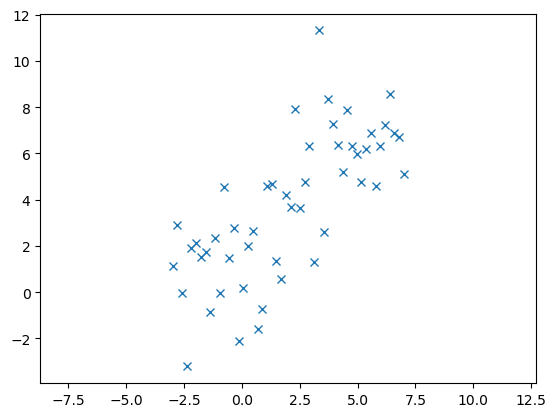

In [4]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

with open('eigen.pkl', 'rb') as f:
    X = pickle.load(f)

plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

Применяем снижение размерности с помощью SVD

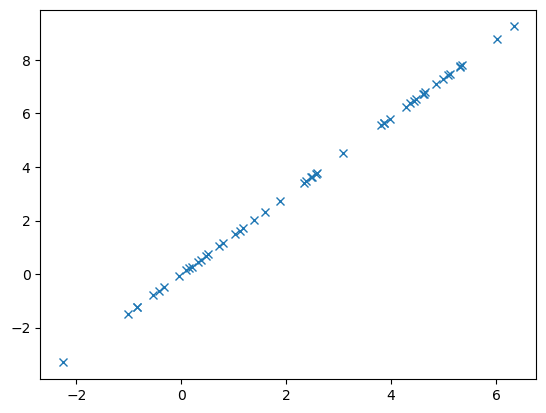

In [5]:
# получаем SVD разложение
svd_model = TruncatedSVD(n_components=1).fit(X)
# применяем преобразование к исходным данным
X_svd = svd_model.transform(X)
# трансформируем данные обратно к исходному пространству
X_svd_restored = svd_model.inverse_transform(X_svd)
# визуализируем то, что получилось
plt.plot(X_svd_restored[:,0], X_svd_restored[:,1], 'x')
plt.show()

Готово! Мы воспользовались алгоритмом снижения размерности TruncatedSVD и получили картинку, похожую на результат применения алгоритма PCA. Оба этих метода сильно похожи, про связь PCA и SVD можно [почитать тут](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8) [или тут](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca/134283). Как понять какой из них выбрать для решения задачи?

* если нужно быстро снизить количество фичей - используйте SVD
* если дополнительно нужно избавиться от корреляции между фичами (например, для задачи линейной регрессии) - используйте PCA